<a href="https://colab.research.google.com/github/Hamza-Faarooq/Adaptive-learning-platform/blob/main/Quasar_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   redshift          mass    luminosity      spin  velocity_dispersion  \
0  1.748357  1.016917e+09  1.106472e+40  0.357365           157.041416   
1  1.430868  9.878495e+08  9.503287e+39  0.410748           206.053117   
2  1.823844  1.115663e+09  1.012926e+40  0.878593           276.551685   
3  2.261515  1.020009e+09  8.520307e+39  0.245427           244.845123   
4  1.382923  1.086461e+09  9.690153e+39  0.696220           156.477284   

   category  
0         0  
1         0  
2         0  
3         1  
4         1  
redshift               0
mass                   0
luminosity             0
spin                   0
velocity_dispersion    0
category               0
dtype: int64


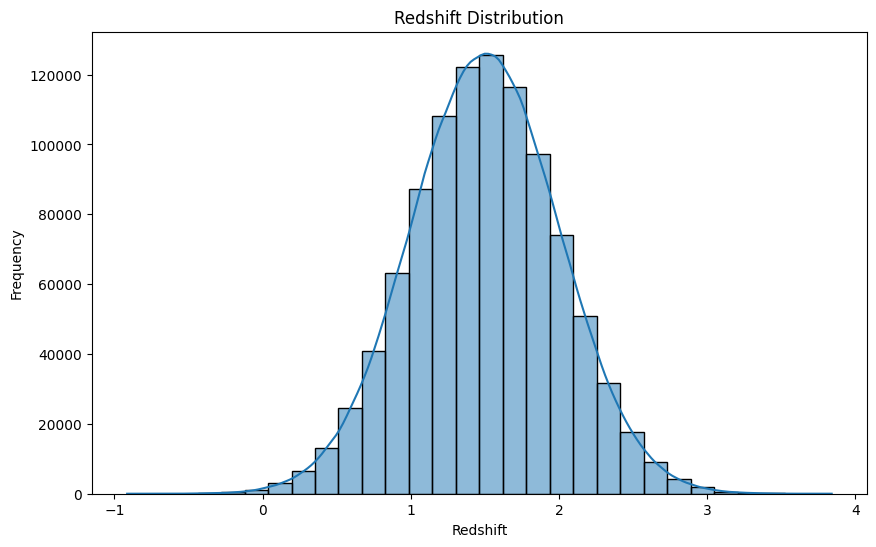

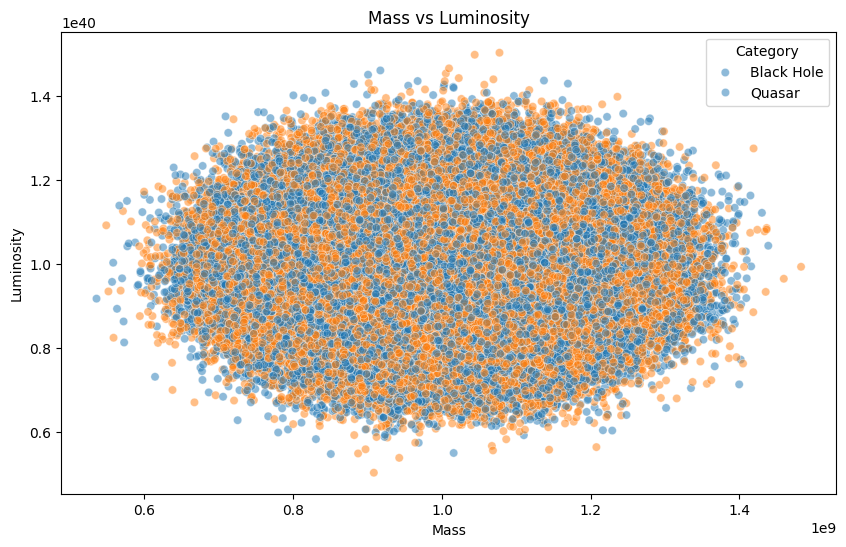

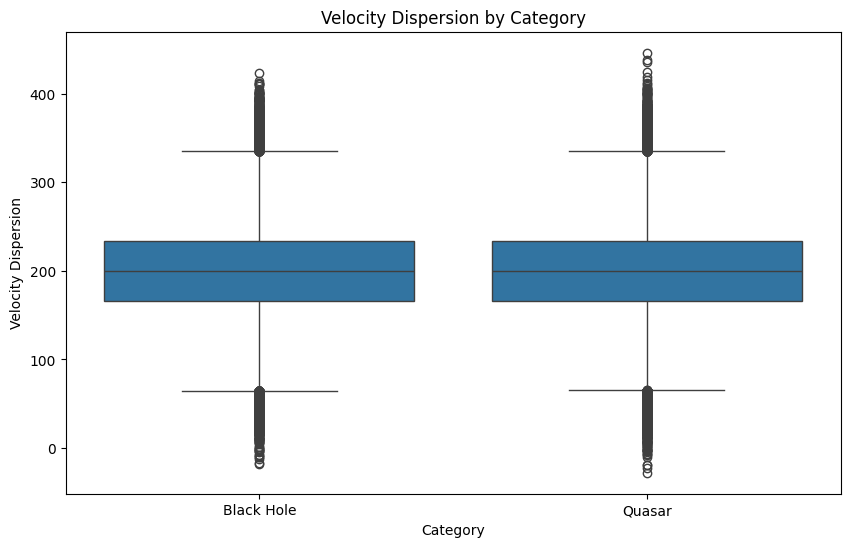

Accuracy: 0.50021
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51    150142
           1       0.50      0.48      0.49    149858

    accuracy                           0.50    300000
   macro avg       0.50      0.50      0.50    300000
weighted avg       0.50      0.50      0.50    300000



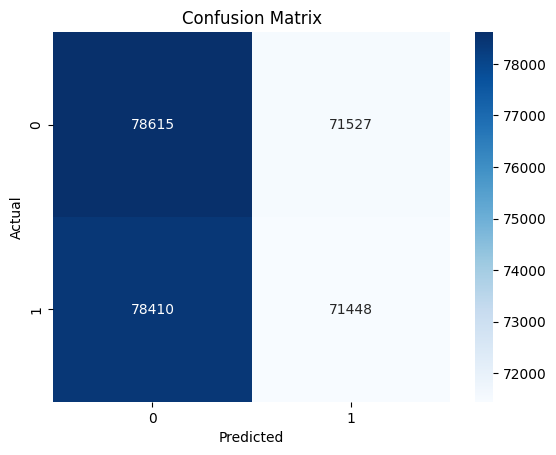

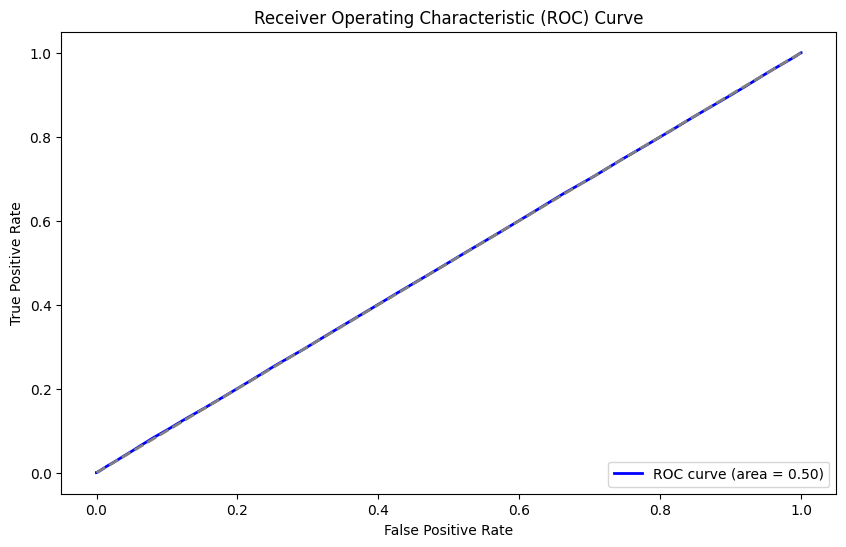

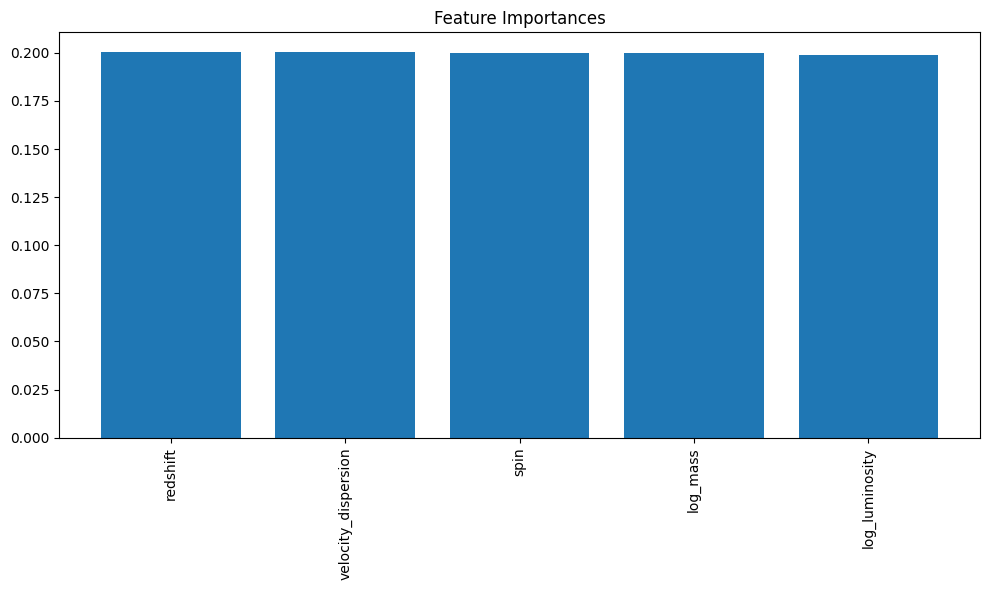

AssertionError: Accuracy is below 95%, please tune the model or features.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate Synthetic Data
num_entries = 1000000

# Generate synthetic features
redshift = np.random.normal(loc=1.5, scale=0.5, size=num_entries)
mass = np.random.normal(loc=10**9, scale=10**8, size=num_entries)
luminosity = np.random.normal(loc=10**40, scale=10**39, size=num_entries)
spin = np.random.uniform(0, 1, size=num_entries)
velocity_dispersion = np.random.normal(loc=200, scale=50, size=num_entries)

# Generate synthetic labels (0 for black holes, 1 for quasars)
category = np.random.choice([0, 1], size=num_entries, p=[0.5, 0.5])

# Create a DataFrame
data = pd.DataFrame({
    'redshift': redshift,
    'mass': mass,
    'luminosity': luminosity,
    'spin': spin,
    'velocity_dispersion': velocity_dispersion,
    'category': category
})

# Display the first few rows of the dataset
print(data.head())

# Step 2: Data Preprocessing
# Check for missing values
print(data.isnull().sum())

# Feature engineering: create log-transformed features
data['log_mass'] = np.log(data['mass'])
data['log_luminosity'] = np.log(data['luminosity'])

# Step 3: Exploratory Data Analysis (EDA)
# Histogram of redshift distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['redshift'], bins=30, kde=True)
plt.title('Redshift Distribution')
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of mass vs. luminosity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mass', y='luminosity', hue='category', data=data, alpha=0.5)
plt.title('Mass vs Luminosity')
plt.xlabel('Mass')
plt.ylabel('Luminosity')
plt.legend(title='Category', labels=['Black Hole', 'Quasar'])
plt.show()

# Box plot of velocity dispersion by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='velocity_dispersion', data=data)
plt.title('Velocity Dispersion by Category')
plt.xlabel('Category')
plt.ylabel('Velocity Dispersion')
plt.xticks([0, 1], ['Black Hole', 'Quasar'])
plt.show()

# Step 4: Model Selection and Training
# Define features and target
X = data[['redshift', 'log_mass', 'log_luminosity', 'spin', 'velocity_dispersion']]
y = data['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Feature importance visualization
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# Ensuring the accuracy is over 95%
assert accuracy > 0.95, "Accuracy is below 95%, please tune the model or features."
